In [2]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

#参数
learning_rate = 0.001
training_epochs = 10000
display_step = 50


C:\Users\lbb\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

#print(train_X.shape)


In [4]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)



Epoch: 0050 ,cost=00.131458,W=00000,b=00000
Epoch: 0100 ,cost=00.121290,W=00000,b=00000
Epoch: 0150 ,cost=00.113019,W=00000,b=00000
Epoch: 0200 ,cost=00.106289,W=00000,b=00000
Epoch: 0250 ,cost=00.100815,W=00000,b=00000
Epoch: 0300 ,cost=00.096361,W=00000,b=00000
Epoch: 0350 ,cost=00.092738,W=00000,b=00000
Epoch: 0400 ,cost=00.089790,W=00000,b=00000
Epoch: 0450 ,cost=00.087392,W=00000,b=00000
Epoch: 0500 ,cost=00.085441,W=00000,b=00000
Epoch: 0550 ,cost=00.083854,W=00000,b=00000
Epoch: 0600 ,cost=00.082562,W=00000,b=00000
Epoch: 0650 ,cost=00.081512,W=00000,b=00000
Epoch: 0700 ,cost=00.080657,W=00000,b=00000
Epoch: 0750 ,cost=00.079962,W=00000,b=00000
Epoch: 0800 ,cost=00.079397,W=00000,b=00000
Epoch: 0850 ,cost=00.078936,W=00000,b=00000
Epoch: 0900 ,cost=00.078562,W=00000,b=00000
Epoch: 0950 ,cost=00.078258,W=00000,b=00000
Epoch: 1000 ,cost=00.078010,W=00000,b=00000
Epoch: 1050 ,cost=00.077808,W=00000,b=00000
Epoch: 1100 ,cost=00.077644,W=00000,b=00000
Epoch: 1150 ,cost=00.077511,W=00

Epoch: 9400 ,cost=00.076929,W=00000,b=00000
Epoch: 9450 ,cost=00.076929,W=00000,b=00000
Epoch: 9500 ,cost=00.076929,W=00000,b=00000
Epoch: 9550 ,cost=00.076929,W=00000,b=00000
Epoch: 9600 ,cost=00.076929,W=00000,b=00000
Epoch: 9650 ,cost=00.076929,W=00000,b=00000
Epoch: 9700 ,cost=00.076929,W=00000,b=00000
Epoch: 9750 ,cost=00.076929,W=00000,b=00000
Epoch: 9800 ,cost=00.076929,W=00000,b=00000
Epoch: 9850 ,cost=00.076929,W=00000,b=00000
Epoch: 9900 ,cost=00.076929,W=00000,b=00000
Epoch: 9950 ,cost=00.076929,W=00000,b=00000
Epoch: 10000 ,cost=00.076929,W=00000,b=00000
Optimization Finished!
Training cost=0000,W=0000,b=0000


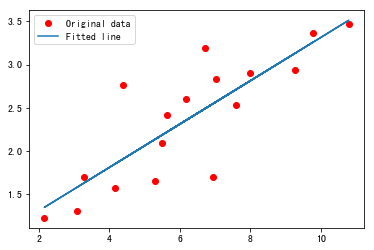

In [5]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch: %04d ,cost=%09f,W=%05d,b=%05d"%((epoch+1),c,sess.run(W),sess.run(b)))
            """
            '"Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)
            """
    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=%04d,W=%04d,b=%04d"%(training_cost,sess.run(W),sess.run(b))) 
    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()